## Esercitazione 5  del    19 Marzo 2024 


In [81]:
import numpy as np
import sys
import sympy as sym
import matplotlib.pyplot as plt
from funcanalitics import DomainCreator, FunctionEvaluator
import funcanalitics as fa
from scipy.special import factorial
from sympy.utilities.lambdify import lambdify
import time

## Esercizio 1 
Si consideri l'equazione quadratica $x^2 + 2px - q = 0 $ con $p=10^5$ e $q=10^{-i}$, i=0,..,10

- Si stabilisca se il problema relativo al calcolo della soluzione $x= -p+\sqrt{p^2+q}$ risulta essere ben
      condizionato per tutti i valori di q assegnati;

- Si calcoli la soluzione x dell'equazione mediante la formula risolutiva indicata al punto precedente e si dica se l'algoritmo di calcolo risulta numericamente
stabile  per i valori di q assegnati

- si individui una forma stabile per il calcolo della soluzione e si verifichi se l'algoritmo di calcolo risulta numericamente stabile per i valori di q assegnati.

In [2]:
p = 10 ** 5
delta = lambda q: -p + np.sqrt(p**2 + q)
new_delta = lambda q: q / (p + np.sqrt(p**2 + q))
dx = lambda q: 1 / (2 * np.sqrt(p + q))

spacing 1.9073486328125e-06
q [1.00000000e+00 9.77237221e-01 9.54992586e-01 ... 1.07151931e-11
 1.04712855e-11 1.02329299e-11]


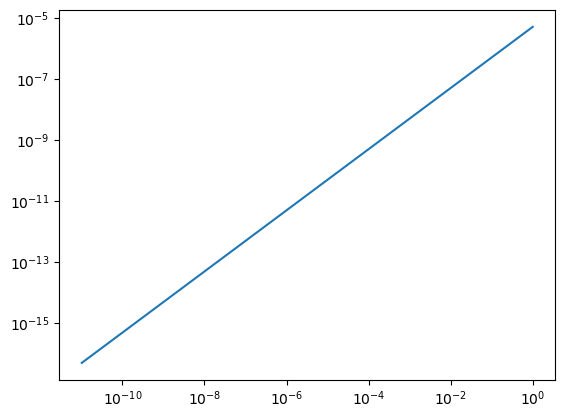

In [3]:
dc = DomainCreator((0, 10), step=0.01)
dc.compute(lambda b: b ** -dc.k)

fe = FunctionEvaluator(new_delta, dc.n)

q = dc.n
plt.loglog(q, fe.y) 
print(f"spacing {np.spacing(p**2)}")
print(f"q {q}")

## Esercizio 2

Realizzate un codice python che implementa il seguente algoritmo. Si tratta dell'implementazione del  metodo di Archimede per l'approssimazione di pi-greco e genera una successione di valori $p_i$, i=1,n, (n scelto dall'utente) che tende a $\pi$. Verificare se all'aumentare di n, la successione $p_i$ tende a $\pi$.

b[0]=2

s[0]=1

for i in range(1,n):

    p[i]=b[i-1]*s[i-1]
    b[i]=2*b[i-1]
     s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)

- Visualizzate su un grafico gli elementi della successione p[i] calcolata Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i], - considerando come valore esatto di pigreco il valore math.pi.

- Giustificate i risultati alla luce della teoria.

- Proponete una versione stabile dell'algoritmo

- Calcolate e visualizzate su un grafico l'errore relativo per ogni componente di p[i] prodotta dall'algoritmo stabilizzato, considerando come valore esatto di
pigreco il valore math.pi.

In [4]:
import math

def arch(n):
    p = np.zeros(n)
    s = np.zeros(n)
    b = np.zeros(n)

    b[0]=2
    s[0]=1

    for i in range(1,n):
        p[i]=b[i-1]*s[i-1]
        b[i]=2*b[i-1]
        s[i]=math.sqrt((1.0-math.sqrt(1-s[i-1]**2))/2.0)
    return p

def opt_arch(n):
    p = np.zeros(n)
    s = np.zeros(n)
    b = np.zeros(n)

    b[0]=2
    s[0]=1

    for i in range(1,n):
        p[i]=b[i-1]*s[i-1]
        b[i]=2*b[i-1]
        s[i] = math.sqrt(s[i-1] ** 2 / 2 * (1 + math.sqrt(1 - s[i-1] ** 2)))
        
    return p

reals_pi = lambda n: np.repeat(math.pi, n)

insert a value 44


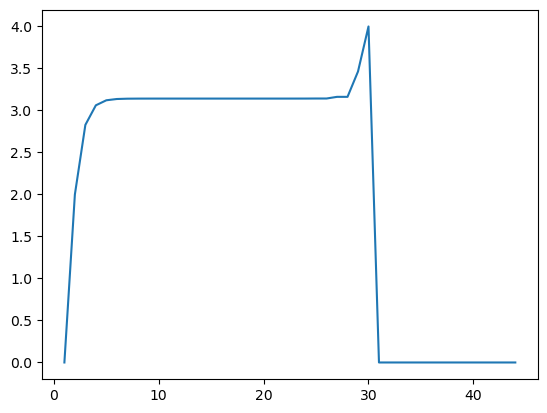

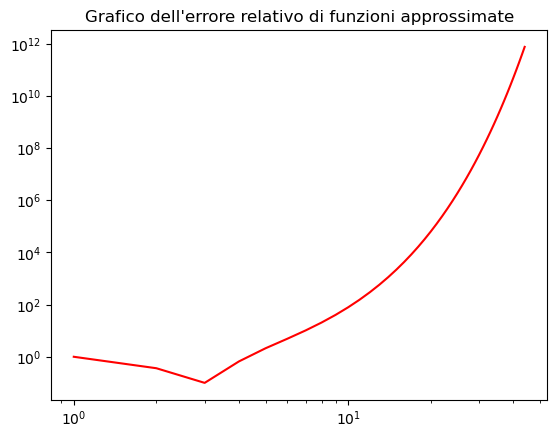

In [5]:
n = int(input("insert a value"))

dc = DomainCreator((1, n))
dc.compute(lambda b: dc.k)

fe = FunctionEvaluator(opt_arch, n)
plt.plot(dc.n, arch(n))
plt.show()

fe.plot_err(reals_pi(n), what=dc.n)


## Esercizio 3   
Si consideri lo sviluppo in serie dell'esponenziale $e^x=1+x+\frac{1}{2!}x^2+\frac{1}{3!}x^3+\cdots =\sum_{k=0}^\infty \frac{x^k}{k!} $. Si calcoli un'approssimazione dell'esponenziale troncando ad N=100 termini la serie, per valori di x che variano da -10 a 10 incluso. Si calcoli  per ogni valore di x l'errore relativo del valore approssimato rispetto al valore esatto, ottenuto mediante la funzione exp della libreria numpy. Cosa si osserva? Pensare ad un algoritmo più stabile ricordando che $e^{-x}=\frac{1}{e^{|x|}}$.



In [2]:
#5
n = 100
k = np.arange(0, n + 1)

exp_expr = lambda k, x: (x ** k / factorial(k)) 
exp_series = lambda range: np.array([np.sum(exp_expr(k, x)) for x in range])
inv_exp_series = lambda range: 1 / np.array([np.sum(exp_expr(k, np.abs(x))) for x in range])
reals = lambda range: np.exp(range)

def stable_algo(param):
    neg_x = inv_exp_series(np.arange(-10.0, 0.0))
    pos_x = exp_series(np.arange(0.0, 11.0))
    return np.append(neg_x, pos_x)

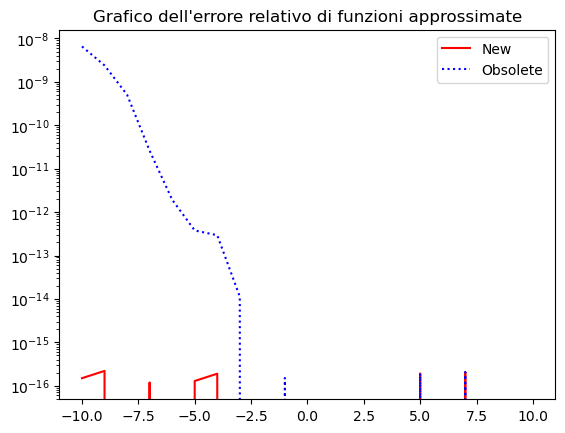

In [3]:
dc = DomainCreator((-10.0, 10.0))
dc.compute(lambda b: dc.k)

x = dc.k
fe = FunctionEvaluator(stable_algo, x, obsolete=exp_series)
fe.plot_err(reals(x), compare=True, what=x)

## Esercizio 4
Calcolare l'approssimazione della derivata prima di f(x) = sin(x) in x = 1
mediante l'algoritmo del rapporto incrementale (f(x + h) - f(x))/h per valori decrescenti
di h, confrontandolo con il valore fornito dalla funzione di libreria per f'(x)
mediante calcolo dell'errore relativo.

In [77]:
#4
import math
x = 1
f = lambda x: np.sin(x)
dx = lambda h: (f(x + h) - f(x)) / h

x_symb = sym.symbols('x')
function = sym.sin(x_symb)
derivate = sym.diff(function, x_symb, 1)
df_numerica = lambdify(x_symb,derivate,np)
reals = lambda n: np.ones(n) * df_numerica(x)


1.1102230246251565


0.5403023058681398

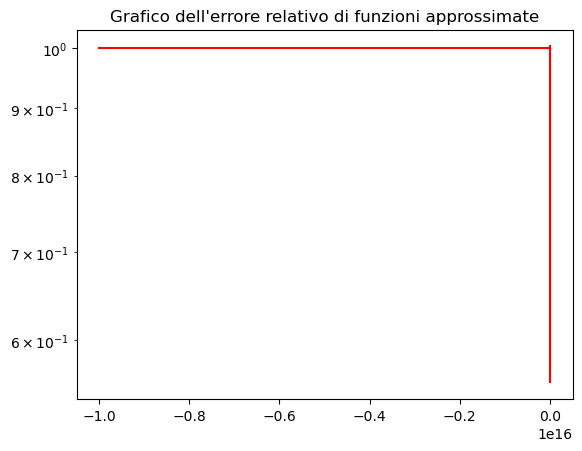

In [91]:

dc = DomainCreator((0, 16))
dc.compute(lambda b: -b ** dc.k)

my_x: np = dc.n
tot = np.append(my_x, pos)
fe = FunctionEvaluator(dx, my_x)
fe.plot_err(reals(my_x.size))

## Esercizio 5
Valutazione di un polinomio in un vettore di punti
-   Realizzare una function  che mediante lo schema di Horner  valuti un polinomio in un vettore di punti.
-   Realizzare una function  che utilizzi l’algoritmo classico per valutare un polinomio in un vettore di punti.
-   Valutare   i seguenti polinomi, con i due metodi implementati nei punti precedenti,  sul vettore di punti specificato  e  rappresentarli graficamente. Confrontarne i tempi 

         p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256  da valutare su vettore di  1000000 punti equidistanti in [1.8,2.2]
         p(x)= x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1   da valutare su vettore di 1000000  punti in [-5:5]
         
Cosa conferma questo esperimento?


In [14]:
#5 
def ruffini_horner(a, x):
    p = a[0]
    n = a.size
    for i in range(1, n):
        p = a[i] + p * x
    return p

def classic_poly_eval(a, x):
    p = a[0]
    r = 1
    n = a.size - 2
    for i in range(1, n):
        r *=  x
        p += a[i] * r
    return p

In [53]:
#plot processing
def plot_time(data, vec, poly_string):
    
    plt.semilogy(vec, elapsed(ruffini_horner, data, vec), 'b.', \
             vec, elapsed(classic_poly_eval, data, vec), 'g.')
    plt.legend(["Ruffini-Horner", "Classic"])
    plt.title(f"Valutazione temporale delle complessità computazionali di algoritmi \
        \n\n{poly_string}\n")

    plt.show()

#time processing
def elapsed(func, data, vec):
    timing_sheet = []
    for i in vec:
        start = time.process_time()
        func(data, i)
        elapsed = time.process_time() - start
        timing_sheet.append(elapsed)
    return timing_sheet

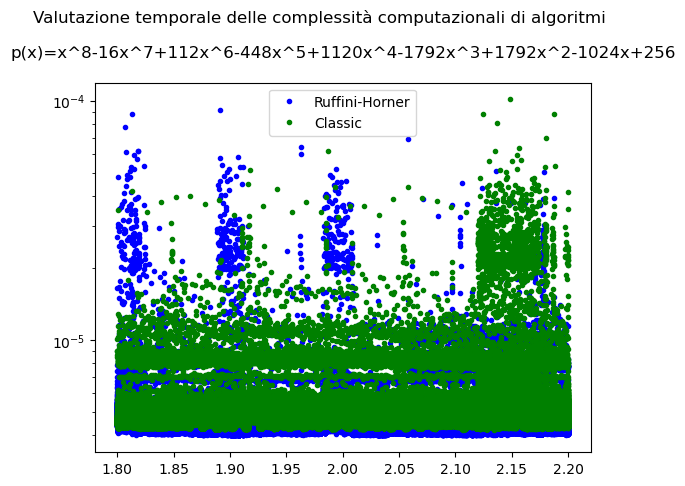

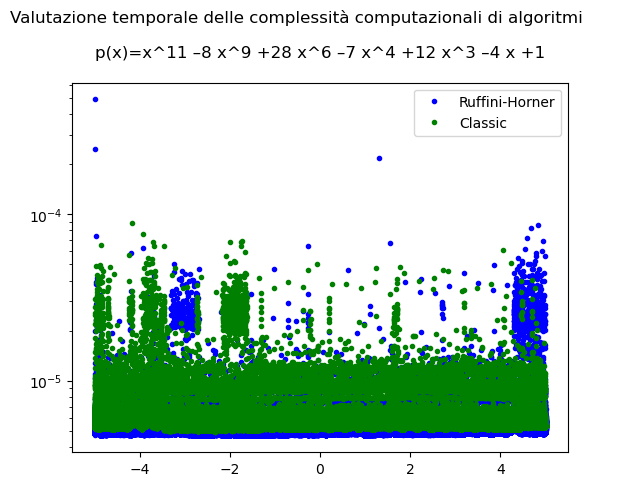

In [55]:
n = 10**6
data_1 = np.array([1.0, -16.0, 112.0, -448, 1120.0, -1792.0, 1792.0, -1024.0, 256.0])
vec = np.linspace(1.8, 2.2, n)

data_2 = np.array([1, 0.0, -8, 0.0, 28.0, 0, -7, 12.0, 0, -4.0, 1])
vec2 = np.linspace(-5.0, 5, n)

plot_time(data_1,vec,"p(x)=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256")
plot_time(data_2,vec2,"p(x)=x^11 –8 x^9 +28 x^6 –7 x^4 +12 x^3 –4 x +1")

## Esercizio 6
Realizzare un codice python che calcola il valore del polinomio p(x)=(x-2)^8 utilizzando le formule

    p=x^8-16x^7+112x^6-448x^5+1120x^4-1792x^3+1792x^2-1024x+256;
    p(x)=(x-2)^8
    e lo schema di Horner

e ne realizza il grafico in un vettore di 10000 equidistanti nell’intervallo [1.8,2.2], [1.9, 2.1],  [1.92,2.08], [1.93,2.07], [1.94,2.06] Spiegare il comportamento osservato. Cosa succede al restringersi dell’intervallo intorno al valore 2, punto in cui questo polinomio si annulla?


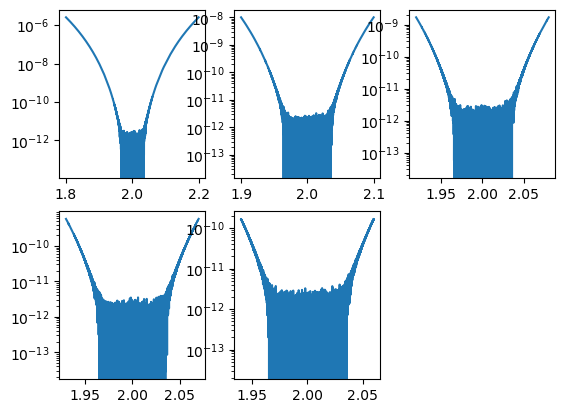

In [28]:
interval = np.array([[np.linspace(1.8, 2.2, 10**4), \
            np.linspace(1.9, 2.1, 10**4), \
            np.linspace(1.92, 2.08, 10**4)], \
            [np.linspace(1.93, 2.07, 10**4), \
            np.linspace(1.94, 2.06, 10**4), \
            np.linspace(1.94, 2.06, 10**4)]\
           ])

rows = interval.shape[0]
cols = interval.shape[1]
counter = 1
# plt.title("Grafico della valutazione di un polinomio\n(x-2)^8")
for i in range(1, rows + 1):
    for j in range(1, cols + 1):
        if counter < 6:
            plt.subplot(rows, cols, counter)
            plt.semilogy(interval[i - 1, j - 1], ruffini_horner(data_1, interval[i - 1, j - 1]))
            counter += 1